---

# **title: '데이터분석-하우스'**

# **date: '2022-07-07 09:00'**

---

In [ ]:
## 구글 드라이브 연동

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 라이브러리 불러오기
- 주요 라이브러리 버전을 확인한다. 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import seaborn as sns 
import sklearn
import xgboost as xgb 
import lightgbm as lgb

print("pandas version :", pd.__version__)
print("numpy version :", np.__version__)
print("matplotlib version :", mpl.__version__)
print("seaborn version :", sns.__version__)
print("scikit-learn version :", sklearn.__version__)
print("xgboost version :", xgb.__version__)
print("lightgbm version :", lgb.__version__)

pandas version : 1.3.5
numpy version : 1.21.6
matplotlib version : 3.2.2
seaborn version : 0.11.2
scikit-learn version : 1.0.2
xgboost version : 0.90
lightgbm version : 2.2.3


## 데이터 불러오기
- pandas 활용

In [ ]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/Human_ai/lecture/house/'
train = pd.read_csv(DATA_PATH + "train.csv")
test = pd.read_csv(DATA_PATH + "test.csv")

print("데이터 불러오기 완료!")

데이터 불러오기 완료!


## 데이터 둘러보기
- 데이터를 둘러봅니다. 
- train : 행 갯수 1460 열 갯수 81 (SalePrice 존재)
- test : 행 갯수 1459, 열 갯수 80 (SalePrice 컬럼 미 존재)

In [ ]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## 데이터 시각화
- 여기에서는 생략
- 종속변수 분포 확인

- 샤피로 검정
- 정규분포인가요? 
    + 정규분포가 아님! --> 로그변환, 박스콕스 변환 등등
    + 정규분포로 만들어 줘야 함. 
- 선형모델의 성능을 올리기 위해서는 

평균: 180921.19589041095
표준편차: 79415.29188606751


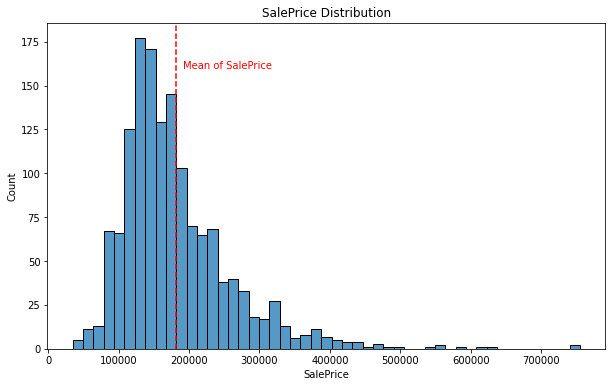

In [ ]:
import matplotlib.pyplot as plt 
from scipy.stats import norm 
(mu, sigma) = norm.fit(train['SalePrice'])
print("평균:", mu)
print("표준편차:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'])
ax.set(title="SalePrice Distribution")
ax.axvline(mu, color = 'r', linestyle = '--')
ax.text(mu + 10000, 160, 'Mean of SalePrice', color = 'r')
plt.show()

- 로그변환을 해서 정규분포로 변환해준다. 

평균: 12.024057394918406
표준편차: 0.39931245219387496


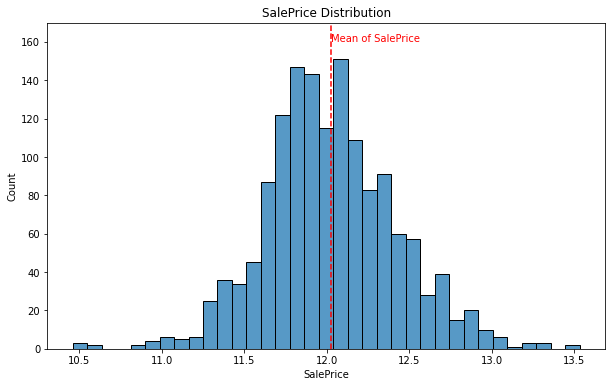

In [ ]:
# 로그변환을 함. 
train['SalePrice'] = np.log1p(train['SalePrice'])

(mu, sigma) = norm.fit(train['SalePrice'])
print("평균:", mu)
print("표준편차:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'])
ax.set(title="SalePrice Distribution")
ax.axvline(mu, color = 'r', linestyle = '--')
ax.text(mu + 0.0001, 160, 'Mean of SalePrice', color = 'r')
ax.set_ylim(0, 170)
plt.show()

## 데이터 전처리
- 컬럼 갯수가 많다?, 어떤 컬럼을 없앨 것인가? 
- 머신러닝 연산 속도부터 높여야 함. 


### 데이터 ID값 제거


In [ ]:
train_ID = train['Id']
test_ID = test['Id']

train = train.drop(['Id'], axis = 1)
train.shape

(1460, 80)

In [ ]:
test = test.drop(['Id'], axis = 1)
test.shape 

(1459, 79)

### Y값 추출
- train데이터에 SalePrice만 따로 저장한다.

In [ ]:
y = train['SalePrice']
train = train.drop('SalePrice', axis = 1)
train.shape

(1460, 79)

In [ ]:
test.shape

(1459, 79)

### 데이터 합치기
- 강의 목적
- 원칙
    + train, 따로 정리
    + test, 따로 정리
- Data Leakage 오류를 범할 가능성이 높음. 

In [ ]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df.shape

(2919, 79)

## 결측치 확인
- 결측치의 비율 확인하는 사용자 정의 함수 작성

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
def check_na(data, head_num = 6):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio' :data_na, 
                               'Data Type': data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data.head(head_num))

check_na(all_df, 20)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
PoolQC            99.657417    object
MiscFeature       96.402878    object
Alley             93.216855    object
Fence             80.438506    object
FireplaceQu       48.646797    object
LotFrontage       16.649538   float64
GarageFinish       5.447071    object
GarageQual         5.447071    object
GarageCond         5.447071    object
GarageYrBlt        5.447071   float64
GarageType         5.378554    object
BsmtExposure       2.809181    object
BsmtCond           2.809181    object
BsmtQual           2.774923    object
BsmtFinType2       2.740665    object
BsmtFinType1       2.706406    object
MasVnrType         0.822199    object
MasVnrArea         0.787941   float64
MSZoning           0.137033    object
BsmtFullBath       0.068517   float64


- 결측치 제거
- 결측치 비율이 높은 변수들을 모두 제거하기로 했다. 

In [ ]:
all_df = all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1)
print(all_df.shape)
check_na(all_df, 40)

(2919, 73)
결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.447071    object
GarageQual         5.447071    object
GarageYrBlt        5.447071   float64
GarageFinish       5.447071    object
GarageType         5.378554    object
BsmtCond           2.809181    object
BsmtExposure       2.809181    object
BsmtQual           2.774923    object
BsmtFinType2       2.740665    object
BsmtFinType1       2.706406    object
MasVnrType         0.822199    object
MasVnrArea         0.787941   float64
MSZoning           0.137033    object
Functional         0.068517    object
Utilities          0.068517    object
BsmtFullBath       0.068517   float64
BsmtHalfBath       0.068517   float64
GarageArea         0.034258   float64
GarageCars         0.034258   float64
TotalBsmtSF        0.034258   float64
KitchenQual        0.034258    object
Electrical         0.034258    object
BsmtUnfSF          0.034258   float64
BsmtFinSF2         0.034258   float64
BsmtFinSF1         0.0

## 결측치 채우기
- train 데이터와 test 데이터가 섞이면 안됨. 
- train / test 분리해서 진행해야 함. 
- 문자데이터 : 자주 등장하는 빈도 값으로 채움
- 숫자데이터 : 평균이 아니라, 중간값으로 채울 예정

In [ ]:
# all_df['SaleType'].value_counts()
all_df['SaleType'].mode()[0]

'WD'

In [ ]:
check_na(all_df, 40)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.447071    object
GarageQual         5.447071    object
GarageYrBlt        5.447071   float64
GarageFinish       5.447071    object
GarageType         5.378554    object
BsmtCond           2.809181    object
BsmtExposure       2.809181    object
BsmtQual           2.774923    object
BsmtFinType2       2.740665    object
BsmtFinType1       2.706406    object
MasVnrType         0.822199    object
MasVnrArea         0.787941   float64
MSZoning           0.137033    object
Functional         0.068517    object
Utilities          0.068517    object
BsmtFullBath       0.068517   float64
BsmtHalfBath       0.068517   float64
GarageArea         0.034258   float64
GarageCars         0.034258   float64
TotalBsmtSF        0.034258   float64
KitchenQual        0.034258    object
Electrical         0.034258    object
BsmtUnfSF          0.034258   float64
BsmtFinSF2         0.034258   float64
BsmtFinSF1         0.034258   flo

In [ ]:
import numpy as np

# 문자열 데이터만 추출
cat_all_vars = train.select_dtypes(exclude=[np.number])
print("The whole number of all_vars", len(list(cat_all_vars)))

# 문자열 데이터 중에서 이미 기 삭제했던 Feature들이 있었기 때문에, 
# 한번 더 Feature를 정리하는 코드를 작성한다. 
# 따라서 38개의 Feature만 추출했다. 
final_cat_vars = []
for v in cat_all_vars:
    if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']:
        final_cat_vars.append(v)

print("The whole number of final_cat_vars", len(final_cat_vars))

# 이제 각 Feature 마다 빈도수가 가장 많이 나타나는 값을 추가하는 코드를 작성한다. 
for i in final_cat_vars:
  all_df[i] = all_df[i].fillna(all_df[i].mode()[0])

# 이제 수치형 데이터만 남은 것을 확인한다. 
check_na(all_df, 20)

The whole number of all_vars 43
The whole number of final_cat_vars 38
결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageYrBlt        5.447071   float64
MasVnrArea         0.787941   float64
BsmtFullBath       0.068517   float64
BsmtHalfBath       0.068517   float64
BsmtFinSF1         0.034258   float64
BsmtFinSF2         0.034258   float64
BsmtUnfSF          0.034258   float64
TotalBsmtSF        0.034258   float64
GarageCars         0.034258   float64
GarageArea         0.034258   float64


- 수치형 데이터의 결측치를 추가할 수 있다. 
- 평균이 아닌 중간값으로 진행한다. 

In [ ]:
import numpy as np

# 방법은 기존과 동일하다. 
# 이번에는 수치형 데이터만 추출한다. 
num_all_vars = list(train.select_dtypes(include=[np.number]))
print("The whole number of all_vars", len(num_all_vars))

# 수치형 데이터 중, 결측치가 많았던 `LotFrontage`만 처리한다. 
num_all_vars.remove('LotFrontage')
print("The whole number of final_cat_vars", len(num_all_vars))

# 이번에는 수치형 데이터의 평균이 아닌 중간값을 지정했다. 
for i in num_all_vars:
  all_df[i].fillna(value=all_df[i].median(), inplace=True)

check_na(all_df, 20)

The whole number of all_vars 36
The whole number of final_cat_vars 35
결측치 데이터 컬럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


## 도출 변수
- 새로운 도출 변수를 작성 (기존 변수 활용)
- 기존 변수 제거 

- 각 층의 면적으로 모두 더해 전체 면적으로 계산한 새로운 변수를 작성한다. 

In [ ]:
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
all_df = all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)
print(all_df.shape)

(2919, 71)


In [ ]:
all_df['Total_Bathrooms'] = (all_df['FullBath'] + (0.5 * all_df['HalfBath']) + all_df['BsmtFullBath'] + (0.5 * all_df['BsmtHalfBath']))
all_df['Total_porch_sf'] = (all_df['OpenPorchSF'] + all_df['3SsnPorch'] + all_df['EnclosedPorch'] + all_df['ScreenPorch'])
all_df = all_df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)
print(all_df.shape)

(2919, 65)


- 연도와 관련된 변수를 추출하는 코드 작성. 

In [ ]:
num_all_vars = list(train.select_dtypes(include=[np.number]))
year_feature = []
for var in num_all_vars:
  if 'Yr' in var:
    year_feature.append(var)
  elif 'Year' in var:
    year_feature.append(var)
  else:  
    print(var, "is not related with Year")
print(year_feature)

MSSubClass is not related with Year
LotFrontage is not related with Year
LotArea is not related with Year
OverallQual is not related with Year
OverallCond is not related with Year
MasVnrArea is not related with Year
BsmtFinSF1 is not related with Year
BsmtFinSF2 is not related with Year
BsmtUnfSF is not related with Year
TotalBsmtSF is not related with Year
1stFlrSF is not related with Year
2ndFlrSF is not related with Year
LowQualFinSF is not related with Year
GrLivArea is not related with Year
BsmtFullBath is not related with Year
BsmtHalfBath is not related with Year
FullBath is not related with Year
HalfBath is not related with Year
BedroomAbvGr is not related with Year
KitchenAbvGr is not related with Year
TotRmsAbvGrd is not related with Year
Fireplaces is not related with Year
GarageCars is not related with Year
GarageArea is not related with Year
WoodDeckSF is not related with Year
OpenPorchSF is not related with Year
EnclosedPorch is not related with Year
3SsnPorch is not rela

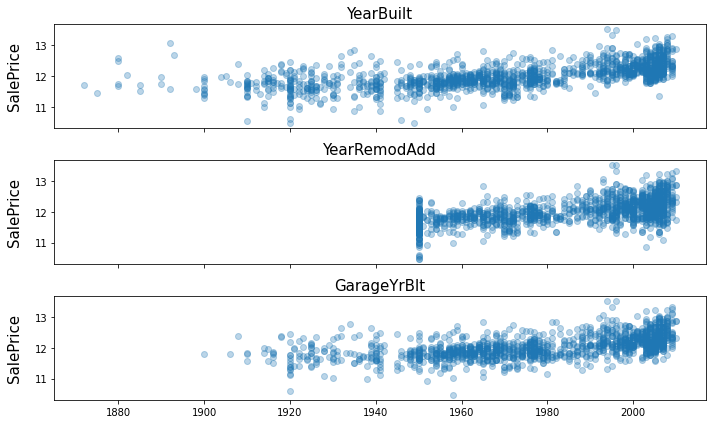

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)
for i, var in enumerate(year_feature):
  if var != 'YrSold':
    ax[i].scatter(train[var], y, alpha=0.3)
    ax[i].set_title('{}'.format(var), size=15)
    ax[i].set_ylabel('SalePrice', size=15, labelpad=12.5)
plt.tight_layout()
plt.show()

In [ ]:
all_df = all_df.drop(['YearBuilt', 'GarageYrBlt'], axis=1)
print(all_df.shape)

(2919, 63)


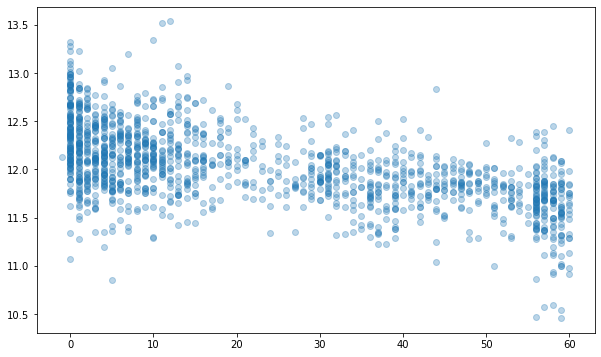

In [ ]:
YearsSinceRemodel = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(YearsSinceRemodel, y, alpha=0.3)
plt.show()

In [ ]:
all_df['YearsSinceRemodel'] = all_df['YrSold'].astype(int) - all_df['YearRemodAdd'].astype(int)
all_df = all_df.drop(['YrSold', 'YearRemodAdd'], axis=1)
print(all_df.shape)

(2919, 62)


## 더미변수
- 더미변수란 원 데이터 독립변수를 0과 1로 변환하는 변수를 말함. 

In [ ]:
all_df['PoolArea'].value_counts() 

0      2906
512       1
648       1
576       1
555       1
480       1
519       1
738       1
144       1
368       1
444       1
228       1
561       1
800       1
Name: PoolArea, dtype: int64

- 사용자 정의 함수 만들기

In [ ]:
def count_dummy(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
all_df['PoolArea'] = all_df['PoolArea'].apply(count_dummy) 
all_df['PoolArea'].value_counts()

0    2906
1      13
Name: PoolArea, dtype: int64

In [ ]:
all_df['GarageArea'] = all_df['GarageArea'].apply(count_dummy)
all_df['GarageArea'].value_counts()

1    2762
0     157
Name: GarageArea, dtype: int64

In [ ]:
all_df['Fireplaces'] = all_df['Fireplaces'].apply(count_dummy)
all_df['Fireplaces'].value_counts()

1    1499
0    1420
Name: Fireplaces, dtype: int64

## 인코딩
- 문자를 숫자로 변환해주는 코드를 인코딩 변환


In [ ]:
print(all_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         2919 non-null   int64  
 1   MSZoning           2919 non-null   object 
 2   LotArea            2919 non-null   int64  
 3   Street             2919 non-null   object 
 4   LotShape           2919 non-null   object 
 5   LandContour        2919 non-null   object 
 6   Utilities          2919 non-null   object 
 7   LotConfig          2919 non-null   object 
 8   LandSlope          2919 non-null   object 
 9   Neighborhood       2919 non-null   object 
 10  Condition1         2919 non-null   object 
 11  Condition2         2919 non-null   object 
 12  BldgType           2919 non-null   object 
 13  HouseStyle         2919 non-null   object 
 14  OverallQual        2919 non-null   int64  
 15  OverallCond        2919 non-null   int64  
 16  RoofStyle          2919 

## Label Encoding ,Ordinal Encoding,One-Hot Encoding
- 인코딩은 문자 데이터를 수치로 변환하는 방법론 중의 하나이다.

In [ ]:
# 분류모형
# 종속변수(양성,음성)
from sklearn.preprocessing import LabelEncoder
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

encoder = LabelEncoder()
encoder.fit(temp['Food_Name'])
labels = encoder.transform(temp['Food_Name'])
print(list(temp['Food_Name']), "==>", labels)

['Apple', 'Chicken', 'Broccoli'] ==> [0 2 1]


In [ ]:
# Ordinal Encoding은 독립변수로만 사용
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

encoder = OrdinalEncoder()
labels = encoder.fit_transform(temp[['Food_Name']])
print(list(temp['Food_Name']), "==>", labels.tolist())

['Apple', 'Chicken', 'Broccoli'] ==> [[0.0], [2.0], [1.0]]


In [ ]:
temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'],
                     'Calories': [95, 231, 50]})

temp['Food_No'] = temp.Food_Name.replace(to_replace = ['Apple', 'Chicken', 'Broccoli'], value = [1, 2, 3])
print(temp[['Food_Name', 'Food_No']])

  Food_Name  Food_No
0     Apple        1
1   Chicken        2
2  Broccoli        3


In [ ]:
#One-Hot Encoding
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

encoder = LabelBinarizer()
encoder.fit(temp['Food_Name'])
transformed = encoder.transform(temp['Food_Name'])
ohe_df = pd.DataFrame(transformed)
temp = pd.concat([temp, ohe_df], axis=1).drop(['Food_Name'], axis=1)
temp.columns = ['Calories', 'Food_Name_Apple', 'Food_Name_Broccoli', 'Food_Name_Chicken']
print(temp)
print(temp.shape)

   Calories  Food_Name_Apple  Food_Name_Broccoli  Food_Name_Chicken
0        95                1                   0                  0
1       231                0                   0                  1
2        50                0                   1                  0
(3, 4)


In [ ]:
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

temp = pd.get_dummies(temp)
print(temp)
print(temp.shape)

   Calories  Food_Name_Apple  Food_Name_Broccoli  Food_Name_Chicken
0        95                1                   0                  0
1       231                0                   0                  1
2        50                0                   1                  0
(3, 4)


- 본 데이터 적용
  + 여기서는 Ordinal Encoding적용 안함(실전에는 필요)
- 원 핫 인코딩 적용

In [ ]:
all_df = pd.get_dummies(all_df).reset_index(drop=True)
all_df.shape

(2919, 258)

- train,test 데이터 합쳐서 진행
- train,test 데이터 재분리

In [ ]:
X = all_df.iloc[:len(y), :]
test = all_df.iloc[len(y):, :]

X.shape, y.shape, test.shape

((1460, 258), (1460,), (1459, 258))

- 머신러닝을 위한 데이터 전처리가 끝남

## 과제
- 남은 시간동안 교제를 모고 머신러닝 학습 및 RMSE 구하세요.
- 데이터셋 분리
 + X데이터를 X-train, X_test, y_train, y_test로 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    #독립변수, 종속변수
    X, y, test_size = 0.3, random_state = 0 
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 258), (438, 258), (1022,), (438,))

In [ ]:
from sklearn.linear_model import  LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(lr_model.score(X_train,y_train))
print(lr_model.score(X_test,y_test))

0.9513387660720953
-52492042.95698945


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html


In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

### 머신러닝 모형 정의, 검증평가
- 교차검증함수 만들기 


In [ ]:
#다양한 모형
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
# 교차 검증
from sklearn.model_selection import KFold, cross_val_score 

# 모형 정의
from sklearn.linear_model import LinearRegression 

def cv_rmse(model, n_folds=5):
    cv = KFold(n_splits = n_folds, random_state=42, shuffle=True)
    rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
    print('CV RMSE Value List:', np.round(rmse_list, 4))
    print('CV RMSE mean List:', np.round(np.mean(rmse_list), 4))
    return rmse_list

In [ ]:
rmse_scores = {} 
lr_model = LinearRegression()

score = cv_rmse(lr_model, n_folds=5)
print('linear regression - mean : {:.4f} (std: {:.4f})'.format(score.mean(), score.std()))

rmse_scores['Linear Regression'] = (score.mean(), score.std())

CV RMSE Value List: [1.2790000e-01 1.2580000e-01 1.1136811e+03 1.5580000e-01 9.2491152e+03]
CV RMSE mean List: 2072.6412
linear regression - mean : 2072.6412 (std: 3614.0617)


### 제출방법
-

In [ ]:
from sklearn.model_selection import cross_val_predict

# X = all_df.iloc[:len(y), :]
# X_test = all_df.iloc[len(y):, :]
# X.shape, y.shape, X_test.shape

lr_model_fit = lr_model.fit(X_train, y_train)
final_preds = np.floor(np.expm1(lr_model_fit.predict(test)))
print(final_preds)

[109089. 160608. 181348. ... 167207. 109945. 204485.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in expm1
  


In [ ]:
submission = pd.read_csv(DATA_PATH + "sample_submission.csv")
submission.iloc[:,1] = final_preds
print(submission.head())
submission.to_csv("submission.csv", index=False)

     Id  SalePrice
0  1461   109089.0
1  1462   160608.0
2  1463   181348.0
3  1464   195114.0
4  1465   189188.0


## 모형 만들기

In [ ]:
 from sklearn.linear_model import LinearRegression
 lr_model = LinearRegression()
 lr_model.fit(X_train, y_train) 

 print(lr_model.score(X_train, y_train))
 print(lr_model.score(X_test, y_test))

0.9513387660720953
-52492042.95698945


## 번외)평가지표
-MAE, MSE, RMSE

### MAE
- 실제값과 예측값의 차이, 오차와 오차들의 절댓값 평균을 말함.

In [ ]:
import numpy as np 

def mean_absolute_error(y_true, y_pred):
    error = 0 
    for yt, yp in zip(y_true, y_pred):
        # yt : 실젯값
        # yp : 예측값
        error = error + np.abs(yt - yp)
        # 절댓값 오차의 평균
    mae = error / len(y_true)
    return mae

def mean_squared_error(y_true, y_pred):
    error = 0 
    for yt, yp in zip(y_true, y_pred):
        # yt : 실젯값
        # yp : 예측값
        error = error + (yt - yp) ** 2
        # 제곱값 오차의 평균
    mse = error / len(y_true)
    return mse

def root_mean_squared_error(y_true, y_pred):
    error = 0 
    for yt, yp in zip(y_true, y_pred):
        # yt : 실젯값
        # yp : 예측값
        error = error + (yt - yp) ** 2
        # 제곱값 오차의 평균
    mse = error / len(y_true)
    
    # 제곱근 추가
    rmse = np.round(np.sqrt(mse), 3)
    return rmse

y_true = [400, 300, 800]
y_pred = [380, 320, 777]

print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", root_mean_squared_error(y_true, y_pred))